# Load data

In [0]:
"""
Author: Pablo Diaz Vergara
"""
# Libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

Remeber to upload .xlsx file in Colab

In [7]:
url='https://github.com/DataScienceResearchPeru/violence_dataset/raw/master/dataset/ready/violence_dataset_reviewed_and_translated.xlsx'
df=pd.read_excel(url)
df=df.fillna('')
df.head()

Fecha y hora Género Edad actual  ... polarity review_len word_count
0 2018-11-09 01:47:08.753                 19  ...  -0.9485        560        108
1 2018-12-12 20:55:27.994                 19  ...  -0.7545       1637        316
2 2020-01-26 23:51:56.509                 20  ...  -0.9888       3472        657
3 2018-04-30 17:56:55.761                     ...  -0.6808        413         92
4 2018-04-30 18:08:40.862                     ...  -0.9470       1118        214

[5 rows x 11 columns]

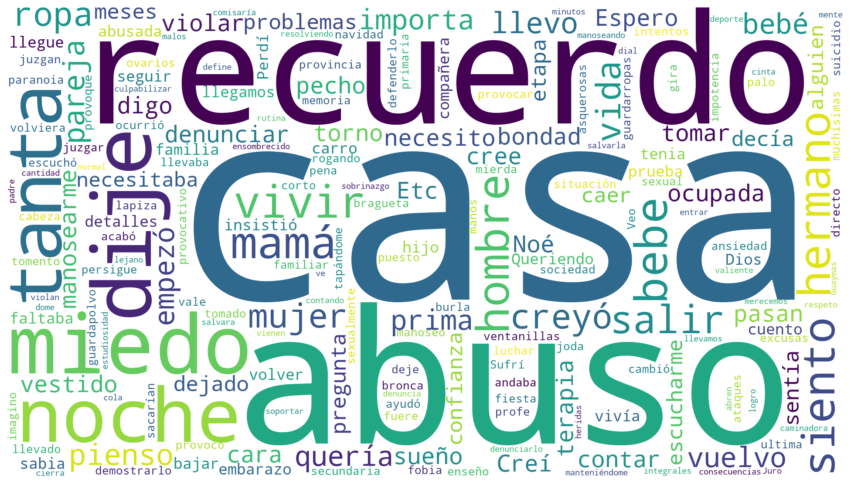

In [9]:
texto = df['RelatoFixedReplaced'].values
stopwords = set(STOPWORDS)
array_stopwords_es=["año","años","quiero","0","1","2","3","4","5","6","7","8","9","_","a","actualmente","acuerdo","adelante","ademas","además","adrede","afirmó","agregó","ahi","ahora","ahí","al","algo","alguna","algunas","alguno","algunos","algún","alli","allí","alrededor","ambos","ampleamos","antano","antaño","ante","anterior","antes","apenas","aproximadamente","aquel","aquella","aquellas","aquello","aquellos","aqui","aquél","aquélla","aquéllas","aquéllos","aquí","arriba","arribaabajo","aseguró","asi","así","atras","aun","aunque","ayer","añadió","aún","b","bajo","bastante","bien","breve","buen","buena","buenas","bueno","buenos","c","cada","casi","cerca","cierta","ciertas","cierto","ciertos","cinco","claro","comentó","como","con","conmigo","conocer","conseguimos","conseguir","considera","consideró","consigo","consigue","consiguen","consigues","contigo","contra","cosas","creo","cual","cuales","cualquier","cuando","cuanta","cuantas","cuanto","cuantos","cuatro","cuenta","cuál","cuáles","cuándo","cuánta","cuántas","cuánto","cuántos","cómo","d","da","dado","dan","dar","de","debajo","debe","deben","debido","decir","dejó","del","delante","demasiado","demás","dentro","deprisa","desde","despacio","despues","después","detras","detrás","dia","dias","dice","dicen","dicho","dieron","diferente","diferentes","dijeron","dijo","dio","donde","dos","durante","día","días","dónde","e","ejemplo","el","ella","ellas","ello","ellos","embargo","empleais","emplean","emplear","empleas","empleo","en","encima","encuentra","enfrente","enseguida","entonces","entre","era","erais","eramos","eran","eras","eres","es","esa","esas","ese","eso","esos","esta","estaba","estabais","estaban","estabas","estad","estada","estadas","estado","estados","estais","estamos","estan","estando","estar","estaremos","estará","estarán","estarás","estaré","estaréis","estaría","estaríais","estaríamos","estarían","estarías","estas","este","estemos","esto","estos","estoy","estuve","estuviera","estuvierais","estuvieran","estuvieras","estuvieron","estuviese","estuvieseis","estuviesen","estuvieses","estuvimos","estuviste","estuvisteis","estuviéramos","estuviésemos","estuvo","está","estábamos","estáis","están","estás","esté","estéis","estén","estés","ex","excepto","existe","existen","explicó","expresó","f","fin","final","fue","fuera","fuerais","fueran","fueras","fueron","fuese","fueseis","fuesen","fueses","fui","fuimos","fuiste","fuisteis","fuéramos","fuésemos","g","general","gran","grandes","gueno","h","ha","haber","habia","habida","habidas","habido","habidos","habiendo","habla","hablan","habremos","habrá","habrán","habrás","habré","habréis","habría","habríais","habríamos","habrían","habrías","habéis","había","habíais","habíamos","habían","habías","hace","haceis","hacemos","hacen","hacer","hacerlo","haces","hacia","haciendo","hago","han","has","hasta","hay","haya","hayamos","hayan","hayas","hayáis","he","hecho","hemos","hicieron","hizo","horas","hoy","hube","hubiera","hubierais","hubieran","hubieras","hubieron","hubiese","hubieseis","hubiesen","hubieses","hubimos","hubiste","hubisteis","hubiéramos","hubiésemos","hubo","i","igual","incluso","indicó","informo","informó","intenta","intentais","intentamos","intentan","intentar","intentas","intento","ir","j","junto","k","l","la","lado","largo","las","le","lejos","les","llegó","lleva","llevar","lo","los","luego","lugar","m","mal","manera","manifestó","mas","mayor","me","mediante","medio","mejor","mencionó","menos","menudo","mi","mia","mias","mientras","mio","mios","mis","misma","mismas","mismo","mismos","modo","momento","mucha","muchas","mucho","muchos","muy","más","mí","mía","mías","mío","míos","n","nada","nadie","ni","ninguna","ningunas","ninguno","ningunos","ningún","no","nos","nosotras","nosotros","nuestra","nuestras","nuestro","nuestros","nueva","nuevas","nuevo","nuevos","nunca","o","ocho","os","otra","otras","otro","otros","p","pais","para","parece","parte","partir","pasada","pasado","paìs","peor","pero","pesar","poca","pocas","poco","pocos","podeis","podemos","poder","podria","podriais","podriamos","podrian","podrias","podrá","podrán","podría","podrían","poner","por","por qué","porque","posible","primer","primera","primero","primeros","principalmente","pronto","propia","propias","propio","propios","proximo","próximo","próximos","pudo","pueda","puede","pueden","puedo","pues","q","qeu","que","quedó","queremos","quien","quienes","quiere","quiza","quizas","quizá","quizás","quién","quiénes","qué","r","raras","realizado","realizar","realizó","repente","respecto","s","sabe","sabeis","sabemos","saben","saber","sabes","sal","salvo","se","sea","seamos","sean","seas","segun","segunda","segundo","según","seis","ser","sera","seremos","será","serán","serás","seré","seréis","sería","seríais","seríamos","serían","serías","seáis","señaló","si","sido","siempre","siendo","siete","sigue","siguiente","sin","sino","sobre","sois","sola","solamente","solas","solo","solos","somos","son","soy","soyos","su","supuesto","sus","suya","suyas","suyo","suyos","sé","sí","sólo","t","tal","tambien","también","tampoco","tan","tanto","tarde","te","temprano","tendremos","tendrá","tendrán","tendrás","tendré","tendréis","tendría","tendríais","tendríamos","tendrían","tendrías","tened","teneis","tenemos","tener","tenga","tengamos","tengan","tengas","tengo","tengáis","tenida","tenidas","tenido","tenidos","teniendo","tenéis","tenía","teníais","teníamos","tenían","tenías","tercera","ti","tiempo","tiene","tienen","tienes","toda","todas","todavia","todavía","todo","todos","total","trabaja","trabajais","trabajamos","trabajan","trabajar","trabajas","trabajo","tras","trata","través","tres","tu","tus","tuve","tuviera","tuvierais","tuvieran","tuvieras","tuvieron","tuviese","tuvieseis","tuviesen","tuvieses","tuvimos","tuviste","tuvisteis","tuviéramos","tuviésemos","tuvo","tuya","tuyas","tuyo","tuyos","tú","u","ultimo","un","una","unas","uno","unos","usa","usais","usamos","usan","usar","usas","uso","usted","ustedes","v","va","vais","valor","vamos","van","varias","varios","vaya","veces","ver","verdad","verdadera","verdadero","vez","vosotras","vosotros","voy","vuestra","vuestras","vuestro","vuestros","w","x","y","ya","yo","z","él","éramos","ésa","ésas","ése","ésos","ésta","éstas","éste","éstos","última","últimas","último","últimos"]
stopwords.update(array_stopwords_es)
wordcloud = WordCloud(stopwords=stopwords, background_color="white",width=1920, height=1080).generate(str(texto))

fig= plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("img.png")

# Exploratory Data Analysis

In [10]:
!apt-get update
!apt-get install python-dev #hunspell
!apt-get install libhunspell-dev #hunspell

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:13 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [933 kB]
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRele

In [15]:
!pip install googletrans
!pip install pyspellchecker
!pip install hunspell

In [16]:
!wget https://raw.githubusercontent.com/wooorm/dictionaries/master/dictionaries/es-MX/index.aff
!wget https://raw.githubusercontent.com/wooorm/dictionaries/master/dictionaries/es-MX/index.dic
!mv /content/index.aff /content/es_MX.aff
!mv /content/index.dic /content/es_MX.dic

--2020-06-04 17:45:06--  https://raw.githubusercontent.com/wooorm/dictionaries/master/dictionaries/es-MX/index.aff
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 157910 (154K) [text/plain]
Saving to: ‘index.aff’

index.aff           100%[===================>] 154.21K  --.-KB/s    in 0.03s   

2020-06-04 17:45:06 (5.72 MB/s) - ‘index.aff’ saved [157910/157910]

--2020-06-04 17:45:08--  https://raw.githubusercontent.com/wooorm/dictionaries/master/dictionaries/es-MX/index.dic
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 703412 (687K) [text

In [23]:
from googletrans import Translator

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

import hunspell
# Buscar diccionarios en carpeta de instalacion
# Más diccionarios de idiomas disponibles en: https://github.com/wooorm/dictionaries/tree/master/dictionaries
diccionario = hunspell.HunSpell('/content/es_MX.dic','/content/es_MX.aff')


from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()


from time import sleep


import random

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [0]:
def corregir_palabras(corrector, palabras, agregarPrimero=[]):   
    #codificacion = corrector.get_dic_encoding()   # obtenemos la codificacion para usarla luego

    # agregamos las palabras aleatorias al diccionario
    for palabra in agregarPrimero:
        corrector.add(palabra)

    # autocorreccion de palabras
    corregida = []
    for p in palabras:
        ok = corrector.spell(p)   # verificamos ortografia
        if not ok:
            sugerencias = corrector.suggest(p)
            if len(sugerencias) > 0:  # hay sugerencias
                # tomamos la  mejor sugerencia(decodificada a string)
                mejor_sugerencia = sugerencias[0]   
                corregida.append(mejor_sugerencia)
            else:
                corregida.append(p)  # no hay ninguna sugerecia para la palabra
        else:
            corregida.append(p)   # esta palabra esta corregida

    return corregida


def corregir_oracion(corrector,string):
    oracion_fixed=''
    if len(string)>0:
        oracion_dirty=string.split()
        oracion_fixed=corregir_palabras(corrector, oracion_dirty,[''])
        oracion_fixed=' '.join(oracion_fixed)
    else:
      print('error')
    return oracion_fixed



def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace('\t', ' ')
    ReviewText = ReviewText.str.replace('\r', ' ')
    ReviewText = ReviewText.str.replace('\n', ' ')
    return (ReviewText)    

In [0]:
def spell_checker_spanish():
    try:
        df.drop('Código', axis=1, inplace=True) # No viene al caso
        df.drop('Nombre', axis=1, inplace=True) # Anonimos
        df.drop('Número', axis=1, inplace=True) # No viene al caso
    except:
        pass

    df['polarity']=0
    df['neg']=0
    df['neu']=0
    df['pos']=0
    df['translated']=0

    for i in range(len(df)):#len(df)
        try:
            temp=df['Relato'][i]        
            fixed=corregir_oracion(diccionario,temp)
            #fixed=preprocess(str(fixed))
            df.loc[i,'RelatoFixed']=fixed
            print(i,end=' - ')
            
        except Exception as e:
            print('Error {}:{}'.format(i,e))

# xlsx is already checked and translated, check columns
# spell_checker_spanish()          

In [27]:
df.head()

Fecha y hora  ...                                        RelatoFixed
0 2018-11-09 01:47:08.753  ...  Sufrí el abuso sexual desde que tengo memoria ...
1 2018-12-12 20:55:27.994  ...  Siento tanta bronca tanta impotencia. Todo es ...
2 2020-01-26 23:51:56.509  ...  Hace tiempo que llevo una vida normal estudios...
3 2018-04-30 17:56:55.761  ...  Tenía un supuesto tío.. desde que tengo uso de...
4 2018-04-30 18:08:40.862  ...  Hace 30 años cuando cumple 15 años mi mamá me ...

[5 rows x 16 columns]

In [0]:
#df['RelatoFixedReplaced'] = preprocess(df['RelatoFixed'])
#df['polarity'] = df['ReviewText'].map(lambda text: TextBlob(text).translate(to="en").sentiment.polarity)
df['review_len'] = df['RelatoFixedTranslated'].astype(str).apply(len)
df['word_count'] = df['RelatoFixedTranslated'].apply(lambda x: len(str(x).split()))

In [0]:
# ALREADY TRANSLATED BY GOOGLE API 

# def implicit():
#     from google.cloud import storage

#     # If you don't specify credentials when constructing the client, the
#     # client library will look for credentials in the environment.
#     storage_client = storage.Client()

#     # Make an authenticated API request
#     buckets = list(storage_client.list_buckets())
#     print(buckets)

# import os 
# os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/content/MAINCRA-00dfa9ca865d.json'    

# """Translates text into the target language.

# Target must be an ISO 639-1 language code.
# See https://g.co/cloud/translate/v2/translate-reference#supported_languages
# """
# from google.cloud import translate_v2 as translate
# translate_client = translate.Client()

# text='Hola, estoy viendo la televisión.'

# # Text can also be a sequence of strings, in which case this method
# # will return a sequence of results for each text.
# result = translate_client.translate(text,target_language='en',source_language='es')
# result['translatedText']


In [0]:
def get_polarity():
  for i in range(len(df)):#len(df)
      try:
          temp=df['RelatoFixedTranslated'][i]    
          # translation= translate_client.translate(temp,target_language='en',source_language='es') # Already translated
          # translation=translation['translatedText'] # Already translated
          p=sid.polarity_scores(str(temp))['compound']
          neg=sid.polarity_scores(str(temp))['neg']
          neu=sid.polarity_scores(str(temp))['neu']
          pos=sid.polarity_scores(str(temp))['pos']
          df.loc[i,'polarity']=p
          df.loc[i,'neg']=neg
          df.loc[i,'neu']=neu
          df.loc[i,'pos']=pos
          #df.loc[i,'translated']=str(translation) # Already translated
          print(i,end=' - ')
          #sleep(0.1+random.random()/2) # Already translated
      except Exception as e:
          print('Error {}:{}'.format(i,e))

In [40]:
get_polarity()

0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 10 - 11 - 12 - 13 - 14 - 15 - 16 - 17 - 18 - 19 - 20 - 21 - 22 - 23 - 24 - 25 - 26 - 27 - 28 - 29 - 30 - 31 - 32 - 33 - 34 - 35 - 36 - 37 - 38 - 39 - 40 - 41 - 42 - 43 - 44 - 45 - 46 - 47 - 48 - 49 - 50 - 51 - 52 - 53 - 54 - 55 - 56 - 57 - 58 - 59 - 60 - 61 - 62 - 63 - 64 - 65 - 66 - 67 - 68 - 69 - 70 - 71 - 72 - 73 - 74 - 75 - 76 - 77 - 78 - 79 - 80 - 81 - 82 - 83 - 84 - 85 - 86 - 87 - 88 - 89 - 90 - 91 - 92 - 93 - 94 - 95 - 96 - 97 - 98 - 99 - 100 - 101 - 102 - 103 - 104 - 105 - 106 - 107 - 108 - 109 - 110 - 111 - 112 - 113 - 114 - 115 - 116 - 117 - 118 - 119 - 120 - 121 - 122 - 123 - 124 - 125 - 126 - 127 - 128 - 129 - 130 - 131 - 132 - 133 - 134 - 135 - 136 - 137 - 138 - 139 - 140 - 141 - 142 - 143 - 144 - 145 - 146 - 147 - 148 - 149 - 150 - 151 - 152 - 153 - 154 - 155 - 156 - 157 - 158 - 159 - 160 - 161 - 162 - 163 - 164 - 165 - 166 - 167 - 168 - 169 - 170 - 171 - 172 - 173 - 174 - 175 - 176 - 177 - 178 - 179 - 180 - 181 - 182 - 183 - 184 - 

In [0]:
try:
  cl = df.loc[df['polarity'] ==1, ['RelatoFixedTranslated']].sample(5).values
  for c in cl:
    print(c[0][:15])
except:
  pass

In [43]:

try:
  cl = df.loc[df['polarity'] ==0, ['RelatoFixedTranslated']].sample(5).values
  for c in cl:
    print(c[0][:15])
except:
  pass

When I was betw
When I was 5 ye
When I was 10 y
When I was betw
My adoptive bro


In [44]:

try:
  cl = df.loc[df.polarity <-0.85, ['RelatoFixedTranslated']].sample(5).values
  for c in cl:
      print(c[0][:15])
except:
  pass

7 years I went 
He was 25 years
At the age of 9
Today I am 28 y
I am 23 years o


In [45]:
!pip install chart_studio 

     |████████████████████████████████| 71kB 2.8MB/s 


In [46]:
# Import libraries
import pandas as pd
import numpy as np
from plotly import __version__
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

cf.go_offline()

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [47]:
configure_plotly_browser_state()

df['polarity'].iplot(
    kind='hist',
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    color="violet",
    title='Distribución de polaridad')

In [48]:
configure_plotly_browser_state()

df['neg'].iplot(
    kind='hist',
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    color="violet",
    title='Distribución de polaridad negativa')

In [49]:
configure_plotly_browser_state()
df['Edad actual'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    color="violet",
    yTitle='count',
    title='Distribución de edad de víctimas')

In [50]:
configure_plotly_browser_state()
df['review_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    color="violet",
    title='Distribución de extensión de relato')

In [51]:
configure_plotly_browser_state()
df['word_count'].iplot(kind='hist',
                        bins=100,
                        xTitle='word count',
                        linecolor='black',
                        yTitle='count',
                        color="violet",
                        title='Distribución de cantidad de palabras por relato')

In [52]:
configure_plotly_browser_state()
df.groupby('País').count()['RelatoFixedTranslated'].iplot(kind='bar', 
                                                          yTitle='Cantidad de casos de violencia',
                                                          linecolor='black',
                                                          opacity=0.8,
                                                           color="violet",
                                                           title='Casos de violencia vs. País')

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction import text 
s=text.ENGLISH_STOP_WORDS.union(array_stopwords_es)

In [0]:
# configure_plotly_browser_state()
# df.groupby('País').count()['Fecha y hora'].sort_values(ascending=False).iplot(kind='bar',
#                                                                                      yTitle='Count',
#                                                                                      linecolor='black',
#                                                                                      opacity=0.8,
#                                                                                      color="violet",
#                                                                                      title='Bar chart of Class Name')

# Monopalabra repetida


In [0]:
# configure_plotly_browser_state()

# def get_top_n_words(corpus, n=None):
#     vec = CountVectorizer().fit(corpus)
#     bag_of_words = vec.transform(corpus)
#     sum_words = bag_of_words.sum(axis=0) 
#     words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
#     words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#     return words_freq[:n]

# common_words = get_top_n_words(df['RelatoFixed'], 20)

# for word, freq in common_words:
#     #print(word, freq)
#     pass

# df1 = pd.DataFrame(common_words, columns = ['RelatoFixed' , 'count'])
# df1.groupby('RelatoFixed').sum()['count'].sort_values(ascending=False).iplot(kind='bar', 
#                                                                             yTitle='Count',
#                                                                             linecolor='black',
#                                                                             color="violet", 
#                                                                             title='Top 20 words in review before removing stop words')

In [63]:
configure_plotly_browser_state()


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = s).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['RelatoFixedReplaced'], 20)

for word, freq in common_words:
    #print(word, freq)
    pass
  
df2 = pd.DataFrame(common_words, columns = ['RelatoFixedReplaced' , 'count'])
df2.groupby('RelatoFixedReplaced').sum()['count'].sort_values(ascending=False).iplot(kind='bar', 
                                                                            yTitle='Cantidad de veces repetidas',
                                                                            linecolor='black',
                                                                            color="violet", 
                                                                            title='20 palabras más repetidas en los relatos')

# Bipalabra repetida

In [0]:
# configure_plotly_browser_state()
# def get_top_n_bigram(corpus, n=None):
#     vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
#     bag_of_words = vec.transform(corpus)
#     sum_words = bag_of_words.sum(axis=0) 
#     words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
#     words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#     return words_freq[:n]
# common_words = get_top_n_bigram(df['RelatoFixed'], 20)
# for word, freq in common_words:
#     #print(word, freq)
#     pass
# df3 = pd.DataFrame(common_words, columns = ['RelatoFixed' , 'count'])
# df3.groupby('RelatoFixed').sum()['count'].sort_values(ascending=False).iplot(kind='bar', 
#                                                                             yTitle='Count',
#                                                                             linecolor='black',
#                                                                             color="violet", 
#                                                                             title='Top 20 bigrams in review before removing stop words')

In [65]:
configure_plotly_browser_state()

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words=array_stopwords_es).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(df['RelatoFixedReplaced'], 20)

for word, freq in common_words:
    #print(word, freq)
    pass

df4 = pd.DataFrame(common_words, columns = ['RelatoFixedReplaced' , 'count'])
df4.groupby('RelatoFixedReplaced').sum()['count'].sort_values(ascending=False).iplot(kind='bar', 
                                                                            yTitle='Cantidad de veces repetidas',
                                                                            linecolor='black',
                                                                            color="violet", 
                                                                            title='20 bi-palabras más repetidas')

# Tri-palabra repetida


In [0]:
# configure_plotly_browser_state()

# def get_top_n_trigram(corpus, n=None):
#     vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
#     bag_of_words = vec.transform(corpus)
#     sum_words = bag_of_words.sum(axis=0) 
#     words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
#     words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#     return words_freq[:n]

# common_words = get_top_n_trigram(df['RelatoFixed'], 20)

# for word, freq in common_words:
#     #print(word, freq)
#     pass
    
# df5 = pd.DataFrame(common_words, columns = ['RelatoFixed' , 'count'])
# df5.groupby('RelatoFixed').sum()['count'].sort_values(ascending=False).iplot(kind='bar', 
#                                                                              yTitle='Cantidad de veces repetidas',
#                                                                              linecolor='black',
#                                                                              color="violet",
#                                                                              title='20 tri-palabras más repetidas')


In [68]:
configure_plotly_browser_state()

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words=array_stopwords_es).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(df['RelatoFixedReplaced'], 20)

for word, freq in common_words:
    #print(word, freq)
    pass

df6 = pd.DataFrame(common_words, columns = ['RelatoFixedReplaced' , 'count'])
df6.groupby('RelatoFixedReplaced').sum()['count'].sort_values(ascending=False).iplot(kind='bar', 
                                                                             yTitle='Cantidad de veces repetidas',
                                                                             linecolor='black',
                                                                             color="violet",
                                                                             title='20 tri-palabras más repetidas')


# Cuatri-palabra repetidas

In [69]:
configure_plotly_browser_state()

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(4, 4), stop_words=array_stopwords_es).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(df['RelatoFixedReplaced'], 20)

for word, freq in common_words:
    #print(word, freq)
    pass

df6 = pd.DataFrame(common_words, columns = ['RelatoFixedReplaced' , 'count'])
df6.groupby('RelatoFixedReplaced').sum()['count'].sort_values(ascending=False).iplot(kind='bar', 
                                                                             yTitle='Cantidad de veces repetidas',
                                                                             linecolor='black',
                                                                             color="violet",
                                                                             title='20 cuatri-palabras más repetidas')


# The distribution of top part-of-speech tags of review corpus

In [70]:
!pip install -U textblob
!python -m textblob.download_corpora

Requirement already up-to-date: textblob in /usr/local/lib/python3.6/dist-packages (0.15.3)
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [0]:
from textblob import TextBlob
import plotly.graph_objects as go

In [73]:

configure_plotly_browser_state()

blob = TextBlob(str(df['RelatoFixed']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(kind='bar',
             xTitle='POS',
             yTitle='count',
             color="violet",
             title='Top 20 Part-of-speech tagging for review corpus')

# País vs polaridad


In [74]:
configure_plotly_browser_state()

y0 = df.loc[df['País'].str.contains('Argentina')]['polarity']
y1 = df.loc[df['País'].str.contains('México') ]['polarity']
y2 = df.loc[df['País'].str.contains('Chile') ]['polarity']
y3 = df.loc[df['País'].str.contains('Colombia')]['polarity']
y4 = df.loc[df['País'].str.contains('Perú')]['polarity']
y5 = df.loc[df['País'].str.contains('Ecuador')]['polarity']
y6 = df.loc[df['País'].str.contains('Venezuela')]['polarity']
y7 = df.loc[df['País'].str.contains('España')]['polarity']

trace0 = go.Box(
    y=y0,
    name = 'Argentina',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'México',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Chile',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Colombia',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Perú',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)
trace5 = go.Box(
    y=y5,
    name = 'Ecuador',
    marker = dict(
        color = 'rgb(100, 0, 10)',
    )
)
trace6 = go.Box(
    y=y6,
    name = 'Venezuela',
    marker = dict(
        color = 'red',
    )
)
trace7 = go.Box(
    y=y7,
    name = 'España',
    marker = dict(
        color = 'yellow',
    )
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]
layout = go.Layout(
    title = "Análisis de polaridad por País"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Análisis de polaridad por País")

# País vs Relato


In [75]:
configure_plotly_browser_state()

y0 = df.loc[df['País'].str.contains('Argentina')]['word_count']
y1 = df.loc[df['País'].str.contains('México') ]['word_count']
y2 = df.loc[df['País'].str.contains('Chile') ]['word_count']
y3 = df.loc[df['País'].str.contains('Colombia')]['word_count']
y4 = df.loc[df['País'].str.contains('Perú')]['word_count']
y5 = df.loc[df['País'].str.contains('Ecuador')]['word_count']
y6 = df.loc[df['País'].str.contains('Venezuela')]['word_count']
y7 = df.loc[df['País'].str.contains('España')]['word_count']

trace0 = go.Box(
    y=y0,
    name = 'Argentina',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'México',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Chile',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Colombia',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Perú',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)
trace5 = go.Box(
    y=y5,
    name = 'Ecuador',
    marker = dict(
        color = 'rgb(100, 0, 10)',
    )
)
trace6 = go.Box(
    y=y6,
    name = 'Venezuela',
    marker = dict(
        color = 'red',
    )
)
trace7 = go.Box(
    y=y7,
    name = 'España',
    marker = dict(
        color = 'yellow',
    )
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]
layout = go.Layout(
    title = "Análisis de polaridad vs. cantidad de palabras en relato"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Análisis de polaridad vs. cantidad de palabras en relato")

# País vs review_len

In [76]:

configure_plotly_browser_state()

y0 = df.loc[df['País'].str.contains('Argentina')]['review_len']
y1 = df.loc[df['País'].str.contains('México') ]['review_len']
y2 = df.loc[df['País'].str.contains('Chile') ]['review_len']
y3 = df.loc[df['País'].str.contains('Colombia')]['review_len']
y4 = df.loc[df['País'].str.contains('Perú')]['review_len']
y5 = df.loc[df['País'].str.contains('Ecuador')]['review_len']
y6 = df.loc[df['País'].str.contains('Venezuela')]['review_len']
y7 = df.loc[df['País'].str.contains('España')]['review_len']

trace0 = go.Box(
    y=y0,
    name = 'Argentina',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'México',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Chile',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Colombia',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Perú',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)
trace5 = go.Box(
    y=y5,
    name = 'Ecuador',
    marker = dict(
        color = 'rgb(100, 0, 10)',
    )
)
trace6 = go.Box(
    y=y6,
    name = 'Venezuela',
    marker = dict(
        color = 'red',
    )
)
trace7 = go.Box(
    y=y7,
    name = 'España',
    marker = dict(
        color = 'yellow',
    )
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]
layout = go.Layout(
    title = "Análisis de polaridad vs. cantidad de letras por relato"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Análisis de polaridad vs. cantidad de letras por relato")

# Distribution of review lengths by polarity

In [77]:
configure_plotly_browser_state()

x0 = df.loc[df['País'] =='Argentina', 'review_len']
x1 = df.loc[df['País'] =='México', 'review_len']
x2 = df.loc[df['País'] =='Chile', 'review_len']
x3 = df.loc[df['País'] =='Colombia', 'review_len']
x4 = df.loc[df['País'] =='Perú', 'review_len']
x5 = df.loc[df['País'] =='Ecuador', 'review_len']
x6 = df.loc[df['País'] =='Venezuela', 'review_len']
x7 = df.loc[df['País'] =='España', 'review_len']

trace0 = go.Histogram(
    x=x1, name = 'Argentina',
    opacity=1.0
)
trace1 = go.Histogram(
    x=x0, name='México',
    opacity=0.95
)
trace2 = go.Histogram(
    x=x1, name = 'Chile',
    opacity=0.90
)
trace3 = go.Histogram(
    x=x1, name = 'Colombia',
    opacity=0.85
)

trace4 = go.Histogram(
    x=x1, name = 'Perú',
    opacity=0.80
)

trace5 = go.Histogram(
    x=x1, name = 'Ecuador',
    opacity=0.75
)

trace6 = go.Histogram(
    x=x1, name = 'Venezuela',
    opacity=0.70
)

trace7 = go.Histogram(
    x=x1, name = 'España',
    opacity=0.65
)

data = [trace1, trace2,trace3,trace4,trace5,trace6,trace7]
layout = go.Layout(barmode='overlay', title='Análisis de País vs. cantidad de letras en relato')
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='Análisis de País vs. cantidad de letras en relato')

In [0]:
# configure_plotly_browser_state()

# x1 = df.loc[df['polarity'] ==0, 'País']
# x0 = df.loc[df['polarity'] ==-1, 'País']

# trace1 = go.Histogram(
#     x=x0, name='-',
#     opacity=0.75
# )
# trace2 = go.Histogram(
#     x=x1, name = '+',
#     opacity=0.75
# )

# data = [trace1, trace2]
# layout = go.Layout(barmode='overlay', title='Distribution of Sentiment polarity of País')
# fig = go.Figure(data=data, layout=layout)

# iplot(fig, filename='overlaid histogram')

# 2D Density jointplot of sentiment País vs. Edad actual

In [79]:
configure_plotly_browser_state()

trace1 = go.Scatter(
    x=df['Edad actual'], y=df['País'], mode='markers', name='points',
    marker=dict(color='rgb(102,0,0)', size=2, opacity=0.4)
)
trace2 = go.Histogram2dContour(
    x=df['Edad actual'], y=df['País'], name='density', ncontours=20,
    colorscale='Hot', reversescale=True, showscale=False
)
trace3 = go.Histogram(
    x=df['Edad actual'], name='Edad actual',
    marker=dict(color='rgb(102,0,0)'),
    yaxis='y2'
)
trace4 = go.Histogram(
    y=df['País'], name='País', marker=dict(color='rgb(102,0,0)'),
    xaxis='x2'
)
data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    showlegend=False,
    autosize=False,
    width=600,
    height=550,
    xaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    yaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    margin=dict(
        t=50
    ),
    hovermode='closest',
    bargap=0,
    xaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    ),
    yaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='2dhistogram-2d-density-plot-subplots')

# 2D Density jointplot of sentiment Edad actual vs review_len

In [80]:
configure_plotly_browser_state()

trace1 = go.Scatter(
    x=df['Edad actual'], y=df['review_len'], mode='markers', name='points',
    marker=dict(color='rgb(102,0,0)', size=2, opacity=0.4)
)
trace2 = go.Histogram2dContour(
    x=df['Edad actual'], y=df['review_len'], name='density', ncontours=20,
    colorscale='Hot', reversescale=True, showscale=False
)
trace3 = go.Histogram(
    x=df['Edad actual'], name='Sentiment Edad actual density',
    marker=dict(color='rgb(102,0,0)'),
    yaxis='y2'
)
trace4 = go.Histogram(
    y=df['review_len'], name='Rating density', marker=dict(color='rgb(102,0,0)'),
    xaxis='x2'
)
data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    showlegend=False,
    autosize=False,
    width=600,
    height=550,
    xaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    yaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    margin=dict(
        t=50
    ),
    hovermode='closest',
    bargap=0,
    xaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    ),
    yaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='2dhistogram-2d-density-plot-subplots')

# 2D Density jointplot of sentiment Edad actual vs word_count

In [81]:
configure_plotly_browser_state()

trace1 = go.Scatter(
    x=df['Edad actual'], y=df['word_count'], mode='markers', name='points',
    marker=dict(color='rgb(102,0,0)', size=2, opacity=0.4)
)
trace2 = go.Histogram2dContour(
    x=df['Edad actual'], y=df['word_count'], name='density', ncontours=20,
    colorscale='Hot', reversescale=True, showscale=False
)
trace3 = go.Histogram(
    x=df['Edad actual'], name='Sentiment Edad actual density',
    marker=dict(color='rgb(102,0,0)'),
    yaxis='y2'
)
trace4 = go.Histogram(
    y=df['word_count'], name='Rating density', marker=dict(color='rgb(102,0,0)'),
    xaxis='x2'
)
data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    showlegend=False,
    autosize=False,
    width=600,
    height=550,
    xaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    yaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    margin=dict(
        t=50
    ),
    hovermode='closest',
    bargap=0,
    xaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    ),
    yaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='2dhistogram-2d-density-plot-subplots')

# 2D Density jointplot of sentiment polarity vs review_len

In [82]:
configure_plotly_browser_state()

trace1 = go.Scatter(
    x=df['review_len'], y=df['polarity'], mode='markers', name='points',
    marker=dict(color='rgb(102,0,0)', size=2, opacity=0.4)
)
trace2 = go.Histogram2dContour(
    x=df['review_len'], y=df['polarity'], name='density', ncontours=20,
    colorscale='Hot', reversescale=True, showscale=False
)
trace3 = go.Histogram(
    x=df['review_len'], name='Sentiment review_len density',
    marker=dict(color='rgb(102,0,0)'),
    yaxis='y2'
)
trace4 = go.Histogram(
    y=df['polarity'], name='Rating density', marker=dict(color='rgb(102,0,0)'),
    xaxis='x2'
)
data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    showlegend=False,
    autosize=False,
    width=600,
    height=550,
    xaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    yaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    margin=dict(
        t=50
    ),
    hovermode='closest',
    bargap=0,
    xaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    ),
    yaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='2dhistogram-2d-density-plot-subplots')

In [83]:
configure_plotly_browser_state()

trace1 = go.Scatter(
    x=df['review_len'], y=df['neg'], mode='markers', name='points',
    marker=dict(color='rgb(102,0,0)', size=2, opacity=0.4)
)
trace2 = go.Histogram2dContour(
    x=df['review_len'], y=df['neg'], name='density', ncontours=20,
    colorscale='Hot', reversescale=True, showscale=False
)
trace3 = go.Histogram(
    x=df['review_len'], name='Sentiment review_len density',
    marker=dict(color='rgb(102,0,0)'),
    yaxis='y2'
)
trace4 = go.Histogram(
    y=df['neg'], name='Rating density', marker=dict(color='rgb(102,0,0)'),
    xaxis='x2'
)
data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    showlegend=False,
    autosize=False,
    width=600,
    height=550,
    xaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    yaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    margin=dict(
        t=50
    ),
    hovermode='closest',
    bargap=0,
    xaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    ),
    yaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='2dhistogram-2d-density-plot-subplots')